# Case study on Supervised learning
   ## Do the following in the iris dataset.
    1. Read the dataset to the python environment.
    2. Do necessary pre-processing steps.
    3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


# 1. Read the dataset to the python environment.

In [694]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,f1_score,confusion_matrix,precision_score,recall_score,accuracy_score

In [695]:
df=pd.read_excel('iris.xls')

In [696]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

# preprocessing

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [698]:
df.shape

(150, 5)

In [699]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Label Encoding

In [700]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

In [701]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    df[a[i]]=label_en.fit_transform(df[a[i]])

In [702]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [703]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,NaN,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Checking for missing values

In [704]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Plotting frequency

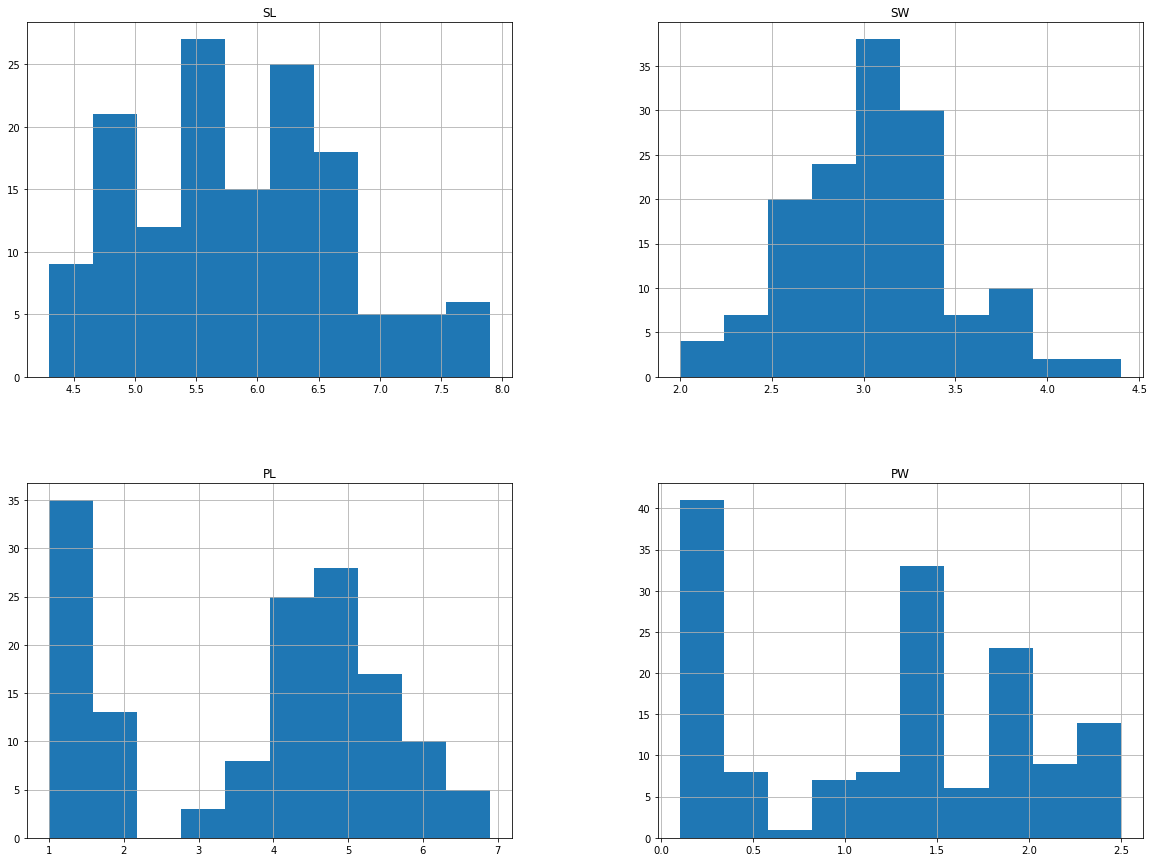

In [705]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

# Filling missing values using KNN Imputer

In [706]:
#KNN_Imputer

In [707]:
from sklearn.impute import KNNImputer

In [708]:
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [709]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [710]:
df.shape

(150, 5)

# Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3d0eb2b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3d0fe52e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3d0eb2f40>,
 'medians': [<matplotlib.lines.Line2D at 0x1e3d0fe5d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e3d0ef8cd0>,
 'means': []}

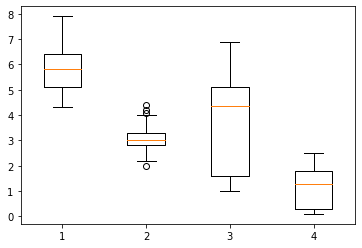

In [711]:
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3cf751c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3cf7519d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3cf751610>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3cf897af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3cf897220>],
 'means': []}

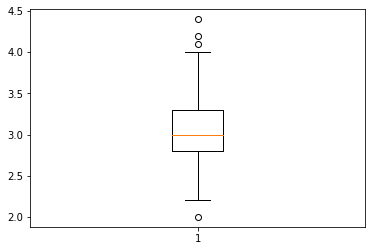

In [712]:
plt.boxplot(df['SW'])

In [713]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.8
3.0
3.3
2.05
4.05


In [714]:
outlier=[]
for x in df['SW']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

In [715]:
ind=df['SW']<low_lim
df.loc[ind].index

Int64Index([60], dtype='int64')

In [716]:
ind1=df['SW']>up_lim
df.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [717]:
df.drop([15, 32, 33, 60],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3cf78d310>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3cf7b4ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3cf78d4f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1e3cf7b4340>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e3cf7b4730>,
 'means': []}

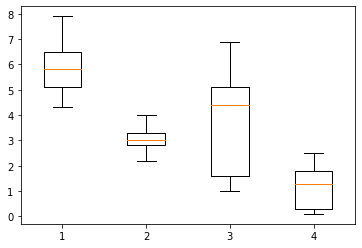

In [718]:
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']])

# Feature Engineering

In [719]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [720]:
df['mean']=df[['SL', 'SW', 'PL', 'PW']].mean(axis=1)
df['sum']=df[['SL', 'SW', 'PL', 'PW']].sum(axis=1)
df['skew']=df[['SL', 'SW', 'PL', 'PW']].skew(axis=1)
df['kurt']=df[['SL', 'SW', 'PL', 'PW']].kurt(axis=1)

In [721]:
df.head()

,SL,SW,PL,PW,Classification,mean,sum,skew,kurt
0,5.1,3.5,1.4,0.2,0.0,2.550,10.2,0.189328,-2.368842
1,4.9,3.0,1.4,0.2,0.0,2.375,9.5,0.404389,-1.091924
2,4.7,3.2,1.3,0.2,0.0,2.350,9.4,0.208782,-2.276657
3,4.6,3.1,1.5,0.2,0.0,2.350,9.4,0.120130,-1.575170
4,5.0,3.6,1.4,0.2,0.0,2.550,10.2,0.090753,-2.787004


In [722]:
df.tail()

,SL,SW,PL,PW,Classification,mean,sum,skew,kurt
145,6.7,3.0,5.2,2.3,2.0,4.300,17.2,0.351514,-2.983606
146,6.3,2.5,5.0,1.9,2.0,3.925,15.7,0.256478,-3.790103
147,6.5,3.0,5.3,2.0,2.0,4.200,16.8,0.085072,-3.407316
148,6.2,3.4,5.4,2.3,2.0,4.325,17.3,-0.146244,-3.387994
149,5.9,3.0,5.1,1.8,2.0,3.950,15.8,-0.185387,-3.345923


In [723]:
df.shape

(146, 9)

# Splitting the data

In [724]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification', 'mean', 'sum', 'skew',
       'kurt'],
      dtype='object')

In [725]:
x=df.drop(['Classification'],axis=1)
y=df['Classification']


In [726]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [727]:
x_train.shape

(116, 8)

In [728]:
y_train.shape

(116,)

In [729]:
x_test.shape

(30, 8)

In [730]:
y_test.shape

(30,)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# Scaling using MinMax Scaler

In [731]:
#from sklearn import preprocessing
#min_max= preprocessing.MinMaxScaler(feature_range=(0,1))

In [732]:
#x_test= min_max.fit_transform(x_test)
#x_train= min_max.fit_transform(x_train)

In [733]:
#x_train=pd.DataFrame(x_train)
#x_test=pd.DataFrame(x_test)

# Scaling using Standard Scaler

In [734]:
from sklearn.preprocessing import StandardScaler

In [735]:
sc=StandardScaler()

In [736]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Building the model using RandomForestClassifier

In [737]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [738]:
f1_score(y_test,y_pred,average='weighted')

0.9663492063492065

In [739]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [740]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PL      26.403935
PW      24.558405
mean    15.531910
sum     15.304671
kurt    12.227972
SL       3.221873
skew     1.571479
SW       1.179755
dtype: float64

# Building the model using Gradient Boosting

In [741]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [742]:
y_predict=gb.predict(x_test)

In [743]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average='weighted'))
print("Recall is:",recall_score(y_test,y_predict,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predict,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [744]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [745]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

[05:06:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\NJ\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [746]:
y_predd=xgb.predict(x_test)

In [747]:
print("Accuracy is:",accuracy_score(y_test,y_predd))
print("Precision is:",precision_score(y_test,y_predd,average='weighted'))
print("Recall is:",recall_score(y_test,y_predd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predd,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [748]:
confusion_matrix(y_test,y_predd)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

# Building the model using Logistic regression

In [749]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)
y_preddd=log_r.predict(x_test)

In [750]:
print("Accuracy is:",accuracy_score(y_test,y_preddd))
print("Precision is:",precision_score(y_test,y_preddd,average='weighted'))
print("Recall is:",recall_score(y_test,y_preddd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_preddd,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [751]:
confusion_matrix(y_test,y_preddd)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

# Building the model using KNN Model

In [752]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predic=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predic)
    acc_values.append(acc)


In [753]:
acc_values

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0, 0.5, 'accuracy')

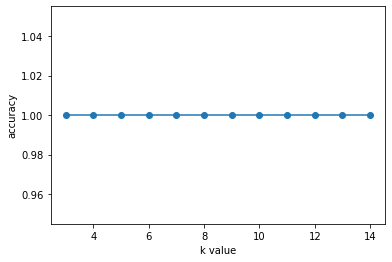

In [754]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [755]:
classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski')
classifier.fit(x_train,y_train)
y_predic=classifier.predict(x_test)

In [756]:
print("Accuracy is:",accuracy_score(y_test,y_predic))
print("Precision is:",precision_score(y_test,y_predic,average='weighted'))
print("Recall is:",recall_score(y_test,y_predic,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predic,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [757]:
confusion_matrix(y_test,y_predic)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

#  Building the model using Decision Tree Model¶

In [758]:
from sklearn.tree import DecisionTreeClassifier

In [759]:
dt=DecisionTreeClassifier()

In [760]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [761]:
y_pr=dt.predict(x_test)

In [762]:
print("Accuracy is:",accuracy_score(y_test,y_pr))
print("Precision is:",precision_score(y_test,y_pr,average='weighted'))
print("Recall is:",recall_score(y_test,y_pr,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pr,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9696969696969696
Recall is: 0.9666666666666667
F1 Score is: 0.9663492063492065


In [763]:
confusion_matrix(y_test,y_pr)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

# Building the model using SVM Model¶

In [764]:
from sklearn.svm import SVC

In [765]:
svm_linear=SVC(kernel='linear')

In [766]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [767]:
y_pre=svm_linear.predict(x_test)

In [768]:
print("Accuracy is:",accuracy_score(y_test,y_pre))
print("Precision is:",precision_score(y_test,y_pre,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9696969696969696
Recall is: 0.9666666666666667
F1 Score is: 0.9663492063492065


In [769]:
confusion_matrix(y_test,y_pre)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [770]:
svm_poly=SVC(kernel='poly',degree=3)

In [771]:
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [772]:
y_pre1=svm_poly.predict(x_test)

In [773]:
print("Accuracy is:",accuracy_score(y_test,y_pre1))
print("Precision is:",precision_score(y_test,y_pre1,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre1,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre1,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [774]:
confusion_matrix(y_test,y_pre1)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [775]:
svm_rad=SVC(kernel='rbf')

In [776]:
svm_rad.fit(x_train,y_train)

SVC()

In [777]:
y_pre2=svm_rad.predict(x_test)

In [778]:
print("Accuracy is:",accuracy_score(y_test,y_pre2))
print("Precision is:",precision_score(y_test,y_pre2,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre2,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre2,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [779]:
confusion_matrix(y_test,y_pre2)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)